# Perceptron
## ( Artificial Neuron)
### - A Perceptron is a singal layer neural network
### - It acts a Linear Classifier, Binary Classification
### - Loss Function : Binary Cross Entropy
###    (-ve of Log Likelihood)
### - Optimisation : Gradient Descent/ Stochastic Gradient Descent

# Learning Goals
### - How to implement Perceptron ?
### - Understanding Vectorization,
###    writing efficient Code
###    without using loop
### - What is the meaning of "Linear Classifier" ?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generating Data


In [2]:
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=11) #500
print(X.shape,Y.shape)

(500, 2) (500,)


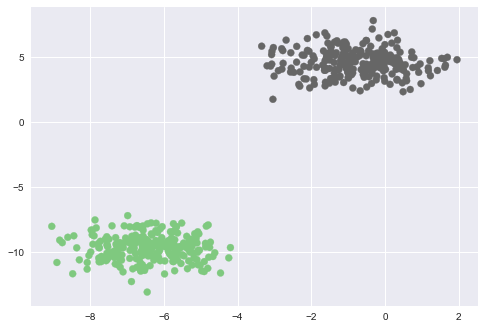

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y, cmap = plt.cm.Accent)
plt.show()

## Model and helper functions

In [4]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))

In [5]:
sigmoid(8)

0.9996646498695336

## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the Predictions

In [6]:
def predict(X,weights):
    """ X -> m*(n+1) matrix,
        w --> ((n+1)x1,) vector   """
    
    # weighted sum
    z = np.dot(X,weights)
    
    # ŷ = σ(z)
    predictions = sigmoid(z)
    
    return predictions

def loss(X,Y,weights):
    """ Binary Cross Entropy"""
    
    Y_ = predict(X,weights)
    
    # L = -[Σ y*log(ŷ) + (1-y)*log(1-ŷ)]
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """ Perform weight updates for 1 epoch"""
    
    # W = W - η*Σ[ŷ - y]ₐₓₒ.[x]ₐₓₒ  
    
    Y_ = predict(X,weights) # ŷ
    dw = np.dot(X.T,Y_ - Y) # [x]ᵀₐₓₒ.[ŷ - y]ₐₓₒ
    
    # dividing by "m" to find mean "Σ"
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m)) 
    
    return weights

def train(X,Y,learning_rate = 0.5, maxEpochs=100):
    
    # Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    
    # Initialize weights 0
    weights = np.zeros(X.shape[1]) # n+1 entries
    
    
    
    # Iterate over all epochs and make updates
    
    e_array = []
    loss_array = []
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            e_array.append(epoch)
            loss_array.append(l)
            #print("Epoch %d Loss %.4f"%(epoch,l))
    

    plt.plot(e_array,loss_array)
    plt.show()
    
    return weights
    

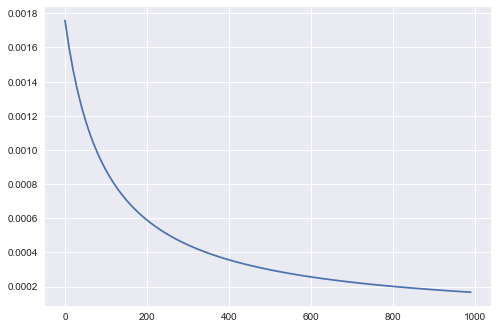

[0.2079143  0.30313474 2.32793286]


In [7]:
weights = train(X,Y, maxEpochs=1000) 
print(weights)

# Perceptron Implementation - Part -II
- Make predictions
- Visualise Decision Surface
- Linear and Non-Linear Classification

In [8]:
def getPredictions(X_Test,weights, labels = True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    
    probs = predict(X_Test, weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5 ] = 1
        return labels

In [9]:
x1 = np.linspace(-8,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

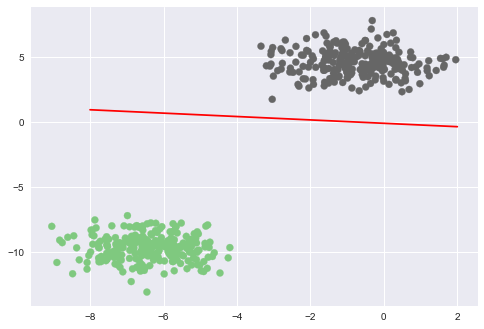

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [14]:
# find the accuracy !

Y_ = getPredictions(X,weights,labels = True)
#print(Y_)

In [16]:
 #Y_ == Y

In [13]:
training_acc = np.sum(Y_ == Y)/Y.shape[0]
print(training_acc)

1.0


# Trying same algorithm on a Non-Linearly seperable dataset

In [90]:
from sklearn.datasets import make_moons

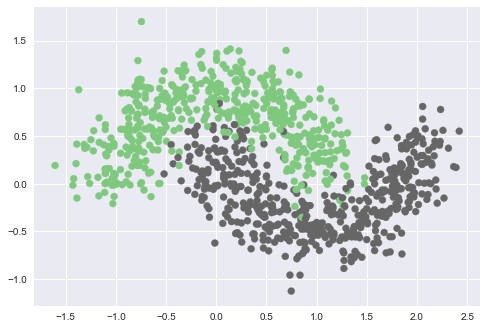

In [91]:
X_nl,Y_nl = make_moons(n_samples = 1000, shuffle=True,noise=0.2,random_state=1)

plt.scatter(X_nl[:,0],X_nl[:,1],c=Y_nl,cmap = plt.cm.Accent)
plt.show()

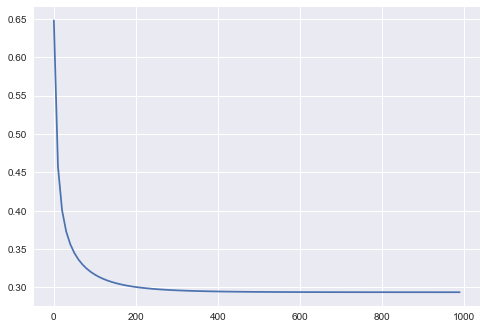

In [92]:
weights_nl = train(X_nl,Y_nl,maxEpochs = 1000)

In [95]:
x1_nl = np.linspace(-2,2,10)
x2_nl = -(weights_nl[0] + weights_nl[1]*x1_nl)/weights_nl[2]

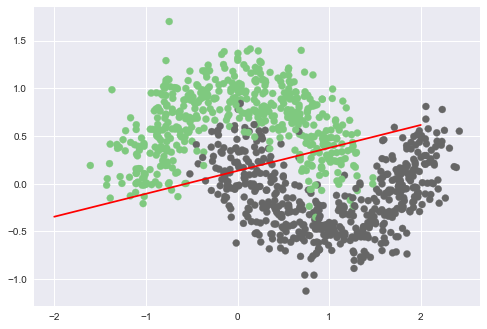

In [96]:
plt.scatter(X_nl[:,0],X_nl[:,1],c=Y_nl,cmap = plt.cm.Accent)
plt.plot(x1_nl,x2_nl,c ='red')
plt.show()

In [99]:
# Accuracy
Y__nl = getPredictions(X_nl,weights_nl,labels=True)
training_acc_nl = np.sum(Y__nl == Y_nl)/Y_nl.shape[0]
print(training_acc_nl)

0.869
